<a href="https://colab.research.google.com/github/yessimico/FraudDetectionProject/blob/main/FraudDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import pandas as pd

In [142]:
df = pd.read_csv("/content/drive/MyDrive/fraudTest.csv")

In [143]:
df.head(5)

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [144]:
df.shape #looking at the size, actually a lot records for my laptop

(555719, 23)

In [145]:
df["is_fraud"].value_counts() #highly imbalanced data

,count
is_fraud,
0,553574
1,2145


In [146]:
df.columns #ok, lets see what kinda values these columns have

Index(['sn', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [147]:
df[df.columns[:15]].head() #we may drop "sn", "first", "last", "street", "city", "zip", "trans_num", "unix_time", "city"

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170


In [148]:
df[df.columns[15:]].head()

,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [149]:
df = df.drop(["sn", "first", "last", "street", "city", "zip", "trans_num", "unix_time", "city"], axis = 1)

In [150]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,39.450498,-109.960431,0
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,40.495810,-74.196111,0
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,Set designer,25-07-1987,28.812398,-80.883061,0
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,M,MI,44.2529,-85.0170,1126,Furniture designer,06-07-1955,44.959148,-85.884734,0


In [151]:
customers = df[["cc_num", "dob", "amt", "job", "gender", "is_fraud", "trans_date_trans_time", "category"]].copy()

In [152]:
from datetime import datetime #taking age from dob
customers["dob"] = pd.to_datetime(customers["dob"], dayfirst=True)

today = pd.to_datetime(datetime.now().date())
customers["age"] = (today - customers["dob"]).dt.days // 365

In [153]:
customers["trans_per_card"] = customers.groupby("cc_num")["amt"].transform("count") #making transactions per card

In [154]:
customers["avg_amt_user"] = customers.groupby("cc_num")["amt"].transform("mean") #making average amount of payments per user

In [155]:
customers["amt_deviation"] = customers["amt"]/customers["avg_amt_user"]
#how far this exact transaction deviates from the average amount of this user

In [156]:
customers[customers["amt_deviation"] > 10][["is_fraud", "amt_deviation"]].head(30)
#checking for myself, if big amt_deviation somehow relates to fraud cases (yes)

,is_fraud,amt_deviation
167,0,14.638392
428,0,30.385547
720,0,11.745494
951,0,50.514629
999,0,31.325184
1044,0,16.311328
1398,0,26.237969
1428,0,32.212102
1695,0,16.862865
1749,0,11.231010


In [157]:
customers["trans_date"] = pd.to_datetime(customers["trans_date_trans_time"]).dt.date

customers["trans_per_day"] = customers.groupby(["cc_num", "trans_date"])["amt"].transform("count")
#checking amount of transactions per day per user

/tmp/ipython-input-3089877863.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customers["trans_date"] = pd.to_datetime(customers["trans_date_trans_time"]).dt.date


In [158]:
customers["amt_zscore"] = (customers["amt"] - customers["avg_amt_user"]) / customers.groupby("cc_num")["amt"].transform("std")
#checking for anomalies with zscore with amount

In [159]:
customers["category_freq_user"] = customers.groupby(["cc_num","category"])["amt"].transform("count")
#frequencies of category for each user
customers["rare_category"] = (customers["category_freq_user"] < 5).astype(int)
#rare category for user
#we will not encode "category column, and instead we wiil use this column"

In [160]:
customers[customers["is_fraud"] == 1][["is_fraud", "trans_per_day", "amt_deviation", "amt_zscore", "category_freq_user", "rare_category"]].head(30)
#checking for myself, if "trans_per_day", "amt_deviation", "amt_zscore", "category_freq_user", "rare_category" somehow relate to fraud cases

,is_fraud,trans_per_day,amt_deviation,amt_zscore,category_freq_user,rare_category
1685,1,2,0.418412,-0.366511,65,0
1767,1,3,11.836683,6.688017,11,0
1781,1,3,9.407381,5.188738,14,0
1784,1,4,18.027436,8.937343,71,0
1857,1,2,14.193847,8.314625,56,0
1891,1,1,0.258431,-0.531770,46,0
1906,1,4,18.873364,9.381352,71,0
1956,1,4,15.587345,7.656590,71,0
1968,1,4,16.443476,8.105956,71,0
2026,1,3,14.485120,8.322538,22,0


In [161]:
customers = customers.drop(["dob", "trans_date_trans_time", "trans_date", "is_fraud"], axis = 1)

In [162]:
customers.head()

,cc_num,amt,job,gender,category,age,trans_per_card,avg_amt_user,amt_deviation,trans_per_day,amt_zscore,category_freq_user,rare_category
0,2.291160e+15,2.86,Mechanical engineer,M,personal_care,57,640,61.893062,0.046209,2,-0.372001,66,0
1,3.573030e+15,29.84,"Sales professional, IT",F,personal_care,36,837,53.596523,0.556753,4,-0.232006,70,0
2,3.598220e+15,41.28,"Librarian, public",F,health_fitness,55,1073,83.053812,0.497027,3,-0.402674,77,0
3,3.591920e+15,60.05,Set designer,M,misc_pos,38,663,59.207526,1.014229,3,0.007763,32,0
4,3.526830e+15,3.19,Furniture designer,M,travel,70,891,55.274501,0.057712,4,-0.683890,39,0


In [163]:
locations = df[["lat", "long", "merch_lat", "merch_long", "city_pop", "state", "cc_num", "is_fraud"]].copy()

In [164]:
locations.head()

,lat,long,merch_lat,merch_long,city_pop,state,cc_num,is_fraud
0,33.9659,-80.9355,33.986391,-81.200714,333497,SC,2.291160e+15,0
1,40.3207,-110.4360,39.450498,-109.960431,302,UT,3.573030e+15,0
2,40.6729,-73.5365,40.495810,-74.196111,34496,NY,3.598220e+15,0
3,28.5697,-80.8191,28.812398,-80.883061,54767,FL,3.591920e+15,0
4,44.2529,-85.0170,44.959148,-85.884734,1126,MI,3.526830e+15,0


In [165]:
from math import radians, sin, cos, sqrt, atan2 #just taking distance in km from coordinates

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1-a))

locations["distance_km"] = locations.apply(lambda x: haversine(x["lat"], x["long"], x["merch_lat"], x["merch_long"]), axis=1)

In [166]:
locations.head()

,lat,long,merch_lat,merch_long,city_pop,state,cc_num,is_fraud,distance_km
0,33.9659,-80.9355,33.986391,-81.200714,333497,SC,2.291160e+15,0,24.561462
1,40.3207,-110.4360,39.450498,-109.960431,302,UT,3.573030e+15,0,104.925092
2,40.6729,-73.5365,40.495810,-74.196111,34496,NY,3.598220e+15,0,59.080078
3,28.5697,-80.8191,28.812398,-80.883061,54767,FL,3.591920e+15,0,27.698567
4,44.2529,-85.0170,44.959148,-85.884734,1126,MI,3.526830e+15,0,104.335106


In [167]:
locations["city_pop"].describe() #want to see what proportion of cities lower than 1000 people

,city_pop
count,5.557190e+05
mean,8.822189e+04
std,3.003909e+05
min,2.300000e+01
25%,7.410000e+02
50%,2.408000e+03
75%,1.968500e+04
max,2.906700e+06


In [168]:
locations["small_city"] = (locations["city_pop"] > 1000).astype(int)

In [169]:
locations[locations["is_fraud"] == 1][["is_fraud", "distance_km", "small_city", "state"]].head(30)
#checking for myself, if big "distance_km", "small_city", "state" somehow relates to fraud cases

,is_fraud,distance_km,small_city,state
1685,1,80.649140,0,TX
1767,1,66.097917,1,WI
1781,1,28.837509,1,WI
1784,1,103.089027,1,LA
1857,1,60.504949,0,TX
1891,1,94.214012,1,FL
1906,1,26.062410,1,LA
1956,1,84.572981,1,LA
1968,1,102.218089,1,LA
2026,1,53.914586,1,WI


In [170]:
locations = locations.drop(["lat", "long", "merch_lat", "merch_long", "city_pop", "is_fraud"], axis = 1) #Im not sure about city_pop

In [171]:
locations.head()

,state,cc_num,distance_km,small_city
0,SC,2.291160e+15,24.561462,1
1,UT,3.573030e+15,104.925092,0
2,NY,3.598220e+15,59.080078,1
3,FL,3.591920e+15,27.698567,1
4,MI,3.526830e+15,104.335106,1


In [172]:
time = df[["cc_num", "trans_date_trans_time", "is_fraud"]].copy()

In [173]:
time.head()

,cc_num,trans_date_trans_time,is_fraud
0,2.291160e+15,21-06-2020 12:14,0
1,3.573030e+15,21-06-2020 12:14,0
2,3.598220e+15,21-06-2020 12:14,0
3,3.591920e+15,21-06-2020 12:15,0
4,3.526830e+15,21-06-2020 12:15,0


In [174]:
time["hour"] = pd.to_datetime(time["trans_date_trans_time"], dayfirst=True).dt.hour
#shows transaction hour

In [175]:
time["is_night"] = ((time["hour"] >= 23) | (time["hour"] <= 5)).astype(int)
#shows is transaction made at night from 23:00 to 05:00

In [176]:
time["dayofweek"] = pd.to_datetime(time["trans_date_trans_time"], dayfirst=True).dt.dayofweek
#shows transaction day of week

In [177]:
time["is_weekend"] = time["dayofweek"].isin([5, 6]).astype(int)
#shows is transaction was made at weekend

In [178]:
time.head()

,cc_num,trans_date_trans_time,is_fraud,hour,is_night,dayofweek,is_weekend
0,2.291160e+15,21-06-2020 12:14,0,12,0,6,1
1,3.573030e+15,21-06-2020 12:14,0,12,0,6,1
2,3.598220e+15,21-06-2020 12:14,0,12,0,6,1
3,3.591920e+15,21-06-2020 12:15,0,12,0,6,1
4,3.526830e+15,21-06-2020 12:15,0,12,0,6,1


In [179]:
time[time["is_fraud"] == 1][["is_fraud", "hour", "is_night", "is_weekend", "dayofweek"]].head(30)
#checking for myself, if big "hour", "is_night", "is_weekend", "dayofweek" somehow relates to fraud cases
#seems is_night really correlates

,is_fraud,hour,is_night,is_weekend,dayofweek
1685,1,22,0,1,6
1767,1,22,0,1,6
1781,1,22,0,1,6
1784,1,22,0,1,6
1857,1,23,1,1,6
1891,1,23,1,1,6
1906,1,23,1,1,6
1956,1,23,1,1,6
1968,1,23,1,1,6
2026,1,23,1,1,6


In [180]:
time = time.drop(["trans_date_trans_time", "is_fraud"], axis = 1)
#we dont need these in the final table

In [181]:
merchant = df[["cc_num", "merchant", "amt", "category", "is_fraud"]].copy()

In [182]:
merchant.head()

,cc_num,merchant,amt,category,is_fraud
0,2.291160e+15,fraud_Kirlin and Sons,2.86,personal_care,0
1,3.573030e+15,fraud_Sporer-Keebler,29.84,personal_care,0
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",41.28,health_fitness,0
3,3.591920e+15,fraud_Haley Group,60.05,misc_pos,0
4,3.526830e+15,fraud_Johnston-Casper,3.19,travel,0


In [183]:
merchant["merchant_freq"] = merchant.groupby("merchant")["amt"].transform("count")
#checking how many transactions makes each merchant

In [184]:
merchant["avg_amt_category"] = merchant.groupby("category")["amt"].transform("mean")
#checking for each category their average amount of payment

In [185]:
merchant[merchant["is_fraud"] == 1][["is_fraud", "category", "merchant_freq", "avg_amt_category"]].head(30)
#checking for myself, if big "category", "merchant_freq", "avg_amt_category" somehow relates to fraud cases (not obvious)

,is_fraud,category,merchant_freq,avg_amt_category
1685,1,health_fitness,735,53.867432
1767,1,misc_net,501,78.600237
1781,1,entertainment,841,63.984840
1784,1,shopping_net,830,83.481653
1857,1,shopping_pos,1006,76.862457
1891,1,health_fitness,748,53.867432
1906,1,shopping_net,857,83.481653
1956,1,shopping_net,799,83.481653
1968,1,shopping_net,857,83.481653
2026,1,shopping_net,837,83.481653


In [186]:
merchant = merchant.drop([ "merchant", "amt", "category"], axis = 1)
# we dont need these in the final table

In [187]:
df.shape

(555719, 15)

In [188]:
customers.shape

(555719, 13)

In [189]:
time.shape

(555719, 5)

In [190]:
merchant.shape

(555719, 4)

In [191]:
locations.shape

(555719, 4)

In [192]:
final_df = pd.concat([
    customers,
    locations,
    time,
    merchant
], axis=1)


In [193]:
final_df.columns

Index(['cc_num', 'amt', 'job', 'gender', 'category', 'age', 'trans_per_card',
       'avg_amt_user', 'amt_deviation', 'trans_per_day', 'amt_zscore',
       'category_freq_user', 'rare_category', 'state', 'cc_num', 'distance_km',
       'small_city', 'cc_num', 'hour', 'is_night', 'dayofweek', 'is_weekend',
       'cc_num', 'is_fraud', 'merchant_freq', 'avg_amt_category'],
      dtype='object')

In [194]:
final_df["state"].unique() #ok, I dont want all these values be as columns. so lets just drop them

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK'], dtype=object)

In [195]:
final_df = final_df.drop(["cc_num", "job", "category", "state"], axis = 1)

In [196]:
final_df.shape, df.shape #checking if we did not lose any records

((555719, 19), (555719, 15))

In [197]:
final_df["gender"] = pd.get_dummies(final_df["gender"], drop_first=True) #encoding gender column

In [198]:
final_df.head()

,amt,gender,age,trans_per_card,avg_amt_user,amt_deviation,trans_per_day,amt_zscore,category_freq_user,rare_category,distance_km,small_city,hour,is_night,dayofweek,is_weekend,is_fraud,merchant_freq,avg_amt_category
0,2.86,True,57,640,61.893062,0.046209,2,-0.372001,66,0,24.561462,1,12,0,6,1,0,736,48.233021
1,29.84,False,36,837,53.596523,0.556753,4,-0.232006,70,0,104.925092,0,12,0,6,1,0,785,48.233021
2,41.28,False,55,1073,83.053812,0.497027,3,-0.402674,77,0,59.080078,1,12,0,6,1,0,755,53.867432
3,60.05,True,38,663,59.207526,1.014229,3,0.007763,32,0,27.698567,1,12,0,6,1,0,711,62.182246
4,3.19,True,70,891,55.274501,0.057712,4,-0.683890,39,0,104.335106,1,12,0,6,1,0,370,112.389683


In [199]:
final_df.columns

Index(['amt', 'gender', 'age', 'trans_per_card', 'avg_amt_user',
       'amt_deviation', 'trans_per_day', 'amt_zscore', 'category_freq_user',
       'rare_category', 'distance_km', 'small_city', 'hour', 'is_night',
       'dayofweek', 'is_weekend', 'is_fraud', 'merchant_freq',
       'avg_amt_category'],
      dtype='object')

In [200]:
X = final_df.drop('is_fraud', axis=1) #for train test split
y = final_df['is_fraud']

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)
#stratify=y ensures that fraud cases splitted appropriately

In [202]:
print(y_train[y_train == 1].value_counts(), y_test[y_test == 1].value_counts()) # checking fraud cases at each data

is_fraud
1    1501
Name: count, dtype: int64 is_fraud
1    644
Name: count, dtype: int64


In [203]:
y.value_counts()

,count
is_fraud,
0,553574
1,2145


In [204]:
644/2145 #ok, test size have exact proportion of fraud cases

0.30023310023310024

In [205]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# We use class_weight='balanced' because fraud cases are much rarer than normal ones

RandomForestClassifier(class_weight='balanced', random_state=42)

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
#precision is high, but recall is low. Recall must be higher

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.97      0.68      0.80       644

    accuracy                           1.00    166716
   macro avg       0.98      0.84      0.90    166716
weighted avg       1.00      1.00      1.00    166716



In [207]:
from sklearn.metrics import precision_score, recall_score

In [208]:
print(precision_score(y_test, y_pred))

0.9669603524229075


In [209]:
print(recall_score(y_test, y_pred))

0.6816770186335404


In [210]:
proba = model.predict_proba(X_test)[:, 1]

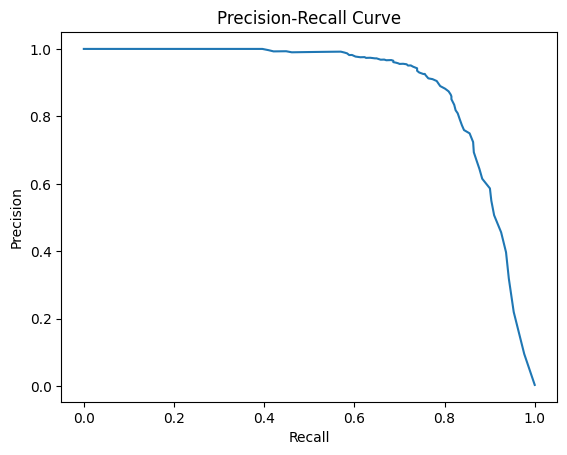

In [211]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, proba)
#lets look how precision_recall_curve looks like and find precision with 0.85 value

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [212]:
import numpy as np

In [213]:
np.where(precision >= 0.85)

(array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
         34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100]),)

In [214]:
thresholds[21] #for presiion value >= 0.85 threshold must be 0.21

np.float64(0.21)

In [215]:
threshold = 0.21
y_pred_new = (proba > threshold).astype(int)

prec = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
print(prec, recall)
#now we are getting good. recall 0.81 and precision 0.85 - excellent, lets try do even better with grid search

0.8592471358428805 0.8152173913043478


In [216]:
from sklearn.model_selection import RandomizedSearchCV
#we will use RandomizedSearchCV to find best params for our model

In [228]:
params = {
    "max_depth" : [20, 25],
    "n_estimators" : [200]
}

In [230]:
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions=params,     # cross validation with 3 folds
    n_jobs=-1, # using all cores of my computer to fit faster
    cv = 3, #cross validating with 3 folds
    verbose = 3, # to see the progress
    random_state=42
)

In [231]:
random_search.fit(X_train, y_train) #it took 11 mins

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=3)

In [232]:
best_model = random_search.best_estimator_ #best model has params : max_depth=10

In [233]:
y_pred_best = best_model.predict(X_test)

In [234]:
print(precision_score(y_test, y_pred_best), recall_score(y_test, y_pred_best))

0.7457627118644068 0.7515527950310559


In [235]:
proba_2 = best_model.predict_proba(X_test)[:, 1]

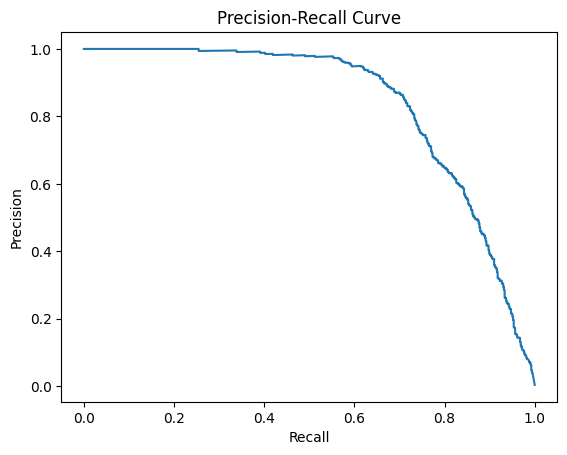

In [236]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, proba_2)
#lets look how precision_recall_curve looks like and find precision with 0.85 value

plt.figure()
plt.plot(recall_2, precision_2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
#the curve became worse, so it will not give us better result, we will use previous model

In [237]:
import joblib #threshold = 0.21
joblib.dump(model, "fraud_model.pkl") #precision 0.85 which was the business goal (recall 0.81)

['fraud_model.pkl']